   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000
Hours     0
Scores    0
dtype: int64


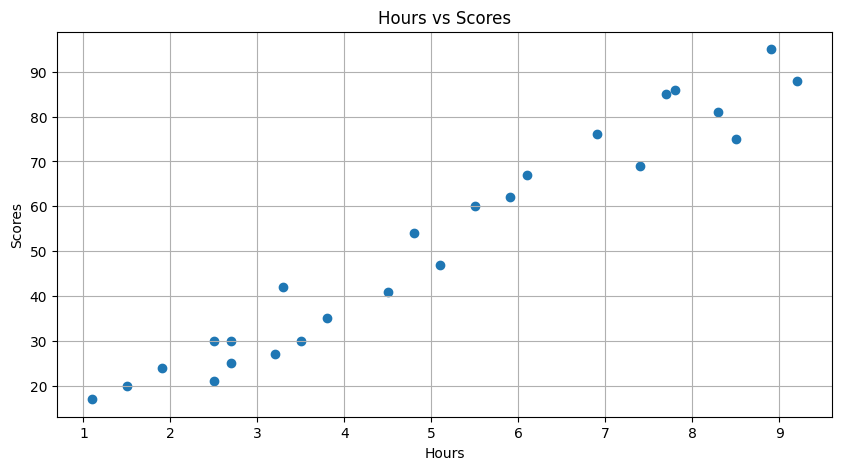

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Coefficient (slope): -1.1596
intercept: 4.4275
Mean Absolute Error (MAE): 5.60
Mean Squared Error (MSE): 40.80
Root Mean Squared Error (RMSE): 6.39
R-squared (R2): 0.93
   Hours  Actual Score  Predicted Score
0    8.3            81               88
1    2.5            30               30
2    2.5            21               30
3    6.9            76               69
4    5.9            62               67


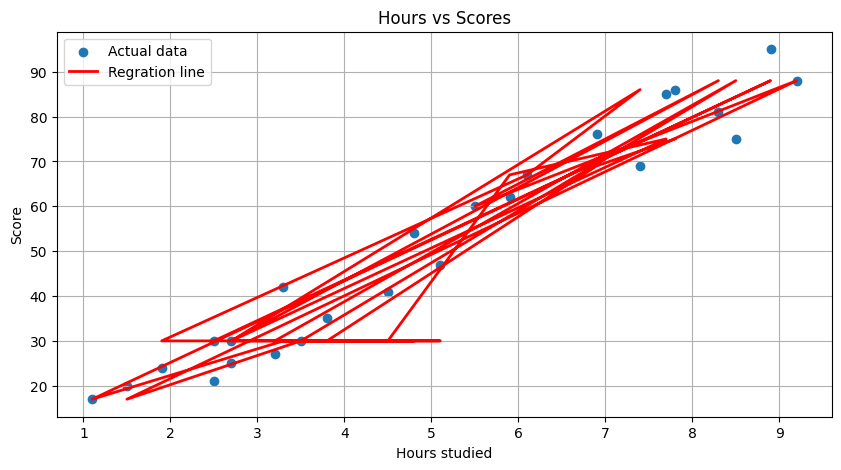

In [19]:
from ast import mod
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import joblib

data = pd.read_csv('student_scores.csv')
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

plt.figure(figsize=(10, 5))
plt.scatter(data['Hours'], data['Scores'])
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.show()
X = data[['Hours']]
y = data['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
print(f"Coefficient (slope): {model.coef_ [0][0]:.4f}")
print(f"intercept: {model.intercept_[0]:.4f}")

y_pred = model.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
results = pd.DataFrame({'Hours': X_test['Hours'].values ,'Actual Score': y_test.values, 'Predicted Score': np.round(y_pred, 2)})
print(results)

plt.figure(figsize=(10, 5))
plt.scatter(X,y,label="Actual data")
plt.plot(X,model.predict(X),color='red',linewidth=2,label="Regration line")
plt.xlabel("Hours studied")
plt.ylabel("Score")
plt.title("Hours vs Scores")
plt.legend()
plt.grid(True)
plt.show()